# Deep Learning Project - Chatbot Project with Python 
<div class="alert alert-block alert-info"> 
Today chatbots are everywhere, they are improving efficiency. Chatbot reduces the dependence on humans and can smartly answer the questions in real-time.
</div>



***Category:*** Machine Learning

**Programming Language:** Python

***Tools & Libraries:*** Keras, Tensorflow, NLTK

***Front End:*** Python – Tkinter

**Back End:** Python

**Prerequisites:** Python, Machine Learning

## Introduction 

***What is Chatbot ?***   
A chatbot is an intelligent piece of software that is capable of communicating and performing actions similar to a human. Chatbots are used a lot in customer interaction, marketing on social network sites and instantly messaging the client. There are two basic types of chatbot models based on how they are built; Retrieval based and Generative based models.
  
***About the Python Project – Chatbot***   
In this Python project, we are going to build a chatbot using deep learning techniques. The chatbot will be trained on the dataset which contains categories (intents), pattern and responses. We use a special recurrent neural network (LSTM) to classify which category the user’s message belongs to and then we will give a random response from the list of responses.

Let’s create a `retrieval based chatbot` using NLTK, Keras, Python, etc.

***Prerequisites***  
The project requires you to have good knowledge of Python, Keras, and Natural language processing (NLTK). Along with them, we will use some helping modules which you can download using the python-pip command : `pip install tensorflow, keras, pickle, nltk`

## Project structure :  
The project will have the following structure:
* `Intents.json` : The data file which has predefined patterns and responses.
* `train_chatbot.py` : In this Python file, we wrote a script to build the model and train our chatbot.
* `Words.pkl` : This is a pickle file in which we store the words Python object that contains a list of our vocabulary.
* `Classes.pkl` : The classes pickle file contains the list of categories.
* `Chatbot_model.h5` : This is the trained model that contains information about the model and has weights of the neurons.
* `Chatgui.py` : This is the Python script in which we implemented GUI for our chatbot. Users can easily interact with the bot.

## Table of Contents 

* [1. Import and load the data file ](#chap1)
* [2. Preprocess data ](#chap2)
* [3. Create training and testing data ](#chap3)
* [4. Build the modelt](#chap4)
* [5. Predict the response](#chap5)

### 1. Importing and loading the data file <a class="anchor" id="chap1"></a>

First, make a file name as `training_chatbot.py`. We import the necessary packages for our chatbot and initialize the variables we will use in our Python project.


 <div class="alert alert-block alert-info"> 
In the file : training_chatbot.py 
</div>


In [1]:
# Loading  packages
import nltk # for NLP 
from nltk.stem import WordNetLemmatizer

import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
import random

In [2]:
# initialize the variables
words=[]
classes = []
documents = []
lemmatizer = WordNetLemmatizer()
ignore_words = ['?', '!'] 

# Loading data ...
data_file = open('Data/intents.json').read()
#import pandas as pd
#pd.read_json('intents.json')
#pd.DataFrame(intents["intents"])
intents = json.loads(data_file)

In [3]:
#intents["intents"]
intents["intents"][0] # first element 

{'tag': 'greeting',
 'patterns': ['Hi there',
  'How are you',
  'Is anyone there?',
  'Hey',
  'Hola',
  'Hello',
  'Good day'],
 'responses': ['Hello, thanks for asking',
  'Good to see you again',
  'Hi there, how can I help?'],
 'context': ['']}

### 2. Preparing the data <a class="anchor" id="chap2"></a>

We need to perform various preprocessing on the data before we make a machine learning or a deep learning model. Based on the requirements we need to apply various operations to preprocess the data.

***Some definitions:***
* Corpus: collection of text documents
* Corps > Doc > Paragraph > Sentences > Tokens
* Tokens : smaller units of a text (word, numbers,  phrases, ngrams)
* Ngrams: combination of N word


Here we iterate through the patterns and tokenize the sentence using nltk.word_tokenize() function and append each word in the words list. We also create a list of classes for our tags.

In [4]:
# Tokenizing is the process of breaking the whole text into small parts like words (tokens).
for intent in intents['intents']:
    for pattern in intent['patterns']:
        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [5]:
classes

['greeting',
 'goodbye',
 'thanks',
 'options',
 'adverse_drug',
 'blood_pressure',
 'blood_pressure_search',
 'pharmacy_search',
 'hospital_search']

In [6]:
words[:6]

['Hi', 'there', 'How', 'are', 'you', 'Is']

Now we will lemmatize each word and remove duplicate words from the list. Lemmatizing is the process of converting a word into its lemma form and then creating a pickle file to store the Python objects which we will use while predicting.

In [7]:
# systematic process for reducing a token to its lemma 
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print(">",len(documents), "documents")
# classes = intents
print (">",len(classes), "classes :", classes)
# words = all words, vocabulary
print (">",len(words), "unique lemmatized words :", words)

#Save the list of our vocabulary (word) and the list of categories(classes)
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

> 47 documents
> 9 classes : ['adverse_drug', 'blood_pressure', 'blood_pressure_search', 'goodbye', 'greeting', 'hospital_search', 'options', 'pharmacy_search', 'thanks']
> 88 unique lemmatized words : ["'s", ',', 'a', 'adverse', 'all', 'anyone', 'are', 'awesome', 'be', 'behavior', 'blood', 'by', 'bye', 'can', 'causing', 'chatting', 'check', 'could', 'data', 'day', 'detail', 'do', 'dont', 'drug', 'entry', 'find', 'for', 'give', 'good', 'goodbye', 'have', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'history', 'hola', 'hospital', 'how', 'i', 'id', 'is', 'later', 'list', 'load', 'locate', 'log', 'looking', 'lookup', 'management', 'me', 'module', 'nearby', 'next', 'nice', 'of', 'offered', 'open', 'patient', 'pharmacy', 'pressure', 'provide', 'reaction', 'related', 'result', 'search', 'searching', 'see', 'show', 'suitable', 'support', 'task', 'thank', 'thanks', 'that', 'there', 'till', 'time', 'to', 'transfer', 'up', 'want', 'what', 'which', 'with', 'you']


### 3. Splitting data into training set and testing set  <a class="anchor" id="chap3"></a>

 - The dataset is split into train and test sets so that we can evaluate our model's performance on unseen data.
 - The model will only be trained on the `train` set and will make predictions on the `test` set whose data points the model has never seen. This will make sure that we have a proper way to test the model.
 
We will create the training data in which we will provide the input and the output. Our input will be the pattern and output will be the class our input pattern belongs to. But the computer doesn’t understand text so we will convert text into numbers.


In [8]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)

In [9]:
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

In [10]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")

Training data created


<ipython-input-10-9ffac2c3f218>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


### 4. Build the model <a class="anchor" id="chap4"></a>
We have our training data ready, now we will build a deep neural network that has 3 layers. We use the Keras sequential API for this. After training the model for 200 epochs, we achieved 100% accuracy on our model. Let us save the model as `chatbot_model.h5`.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               11392     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 585       
Total params: 20,233
Trainable params: 20,233
Non-trainable params: 0
_________________________________________________________________


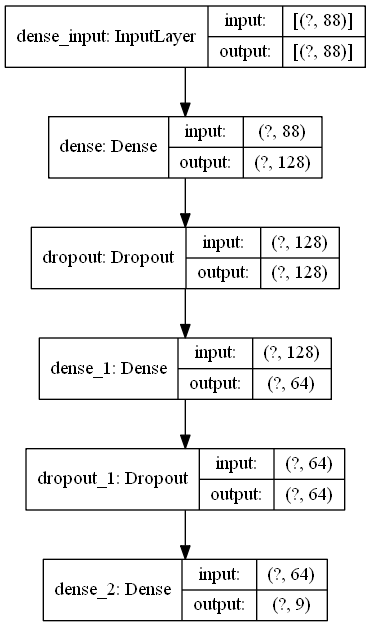

In [11]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
# or 
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
print('Training finished')

Epoch 1/200
10/10 [==============================] - 0s 998us/step - loss: 0.0413 - accuracy: 1.0000
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 3/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 1.0000
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0137 - accuracy: 1.0000
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9787
Epoch 6/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0275 - accuracy: 1.0000
Epoch 7/200
10/10 [==============================] - 0s 1ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 8/200
10/10 [==============================] - 0s 798us/step - loss: 0.0438 - accuracy: 0.9787
Epoch 9/200
10/10 [==============================] - 0s 898us/step - loss: 0.0200 - accuracy: 1.0000
Epoch 10/200
10/10 [==============================] - 0s 899us/step - loss: 0.0056 - accuracy: 1.0000
E

In [23]:
# saving the model 
model.save('chatbot_model.h5', hist)
print("model created")

model created


### 5. Predict the response (Graphical User Interface) <a class="anchor" id="chap5"></a>

To predict the sentences and get a response from the user to let us create a new file `chatbot_app.py`.

We will load the trained model and then use a graphical user interface that will predict the response from the bot. The model will only tell us the class it belongs to, so we will implement some functions which will identify the class and then retrieve us a random response from the list of responses.

Again we import the necessary packages and load the ‘words.pkl’ and ‘classes.pkl’ pickle files which we have created when we trained our model

 <div class="alert alert-block alert-info"> 
In the file : chatbot_app.py 
</div>


In [15]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
from keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
intents = json.loads(open('Data/intents.json').read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

To predict the class, we will need to provide input in the same way as we did while training. So we will create some functions that will perform text preprocessing and then predict the class.

In [16]:
def clean_up_sentence(sentence):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words
    # return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words) 
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

After predicting the class, we will get a random response from the list of intents.

In [24]:
def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(text):
    ints = predict_class(text, model)
    res = getResponse(ints, intents)
    return res


Now we will develop a graphical user interface. Let’s use Tkinter library which is shipped with tons of useful libraries for GUI. We will take the input message from the user and then use the helper functions we have created to get the response from the bot and display it on the GUI. Here is the full source code for the GUI.

In [30]:
#Creating GUI with tkinter
import tkinter
from tkinter import *

def send():
    msg = EntryBox.get("1.0",'end-1c').strip()
    EntryBox.delete("0.0",END)
    if msg != '':
        ChatLog.config(state=NORMAL)
        ChatLog.insert(END, "You: " + msg + '\n\n')
        ChatLog.config(foreground="#442265", font=("Verdana", 12 ))
        res = chatbot_response(msg)
        ChatLog.insert(END, "Bot: " + res + '\n\n')
        ChatLog.config(state=DISABLED)
        ChatLog.yview(END)
        
base = Tk()
base.title("ChatBot Milou")
base.geometry("00x500")
base.resizable(width=FALSE, height=FALSE)
#Create Chat window
ChatLog = Text(base, bd=0, bg="white", height="8", width="50", font="Arial",)
ChatLog.config(state=DISABLED)
#Bind scrollbar to Chat window
scrollbar = Scrollbar(base, command=ChatLog.yview, cursor="heart")
ChatLog['yscrollcommand'] = scrollbar.set
#Create Button to send message
SendButton = Button(base, font=("Verdana",12,'bold'), text="Send", width="12", height=5,
                    bd=0, bg="#32de97", activebackground="#3c9d9b",fg='#ffffff',
                    command= send )
#Create the box to enter message
EntryBox = Text(base, bd=0, bg="white",width="29", height="5", font="Arial")
#EntryBox.bind("<Return>", send)
#Place all components on the screen
scrollbar.place(x=376,y=6, height=386)
ChatLog.place(x=6,y=6, height=386, width=370)
EntryBox.place(x=128, y=401, height=90, width=265)
SendButton.place(x=6, y=401, height=90)
base.mainloop()

### 6. Run the chatbot <a class="anchor" id="chap6"></a>

To run the chatbot, we have two main files; train_chatbot.py and chatapp.py.

First, we train the model using the command in the terminal:  
`python train_chatbot.py`   
If we don’t see any error during training, we have successfully created the model. Then to run the app, we run the second file.  
`python chatgui.py`   

The program will open up a GUI window within a few seconds. With the GUI you can easily chat with the bot.